In [1]:
import numpy as np
from scipy.optimize import root
from scipy.optimize import root
import matplotlib.pyplot as plt
from typing import List
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [121]:
df_rpr = pd.read_excel("Выгрузка_режимы_1А.xlsx",sheet_name='RPR')
df_rgip = pd.read_excel("Выгрузка_режимы_1А.xlsx",sheet_name='RGIPG')
df_WGP = pd.read_excel("Выгрузка_режимы_1А.xlsx",sheet_name='WGP',header=(0,1))
df_WGP

rpr_arr= df_rpr.drop(['RPR'],axis=1).to_numpy()
rgip_arr= df_rgip.drop(['RGIPG'],axis=1).to_numpy()
wgp_arr= df_WGP.drop([('Регион №','WGP')],axis=1).to_numpy()


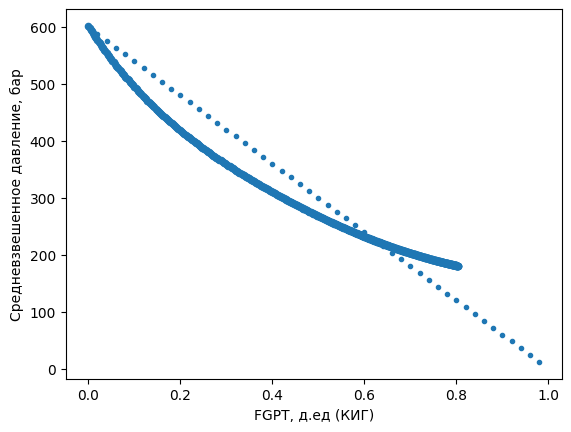

In [ ]:
wgp_total = wgp_arr.cumsum(0)
g0_arr = rgip_arr[0]
p_plot = (rpr_arr * g0_arr).sum(1) / g0_arr.sum()
f_Z = np.poly1d([5.64E-06, -0.002039437, 1.0062])
total_plot = f_Z(wgp_total.sum(1)/g0_arr.sum())
ax = pd.DataFrame({
    'Средневзвешенное давление, бар':p_plot,
    'FGPT, д.ед (КИГ)':total_plot
    }).plot.scatter(x='FGPT, д.ед (КИГ)',y='Средневзвешенное давление, бар')
ax.scatter(np.arange(50)/50, 600*(1-np.arange(50)/50),marker='.')

<Axes: ylabel='Count'>

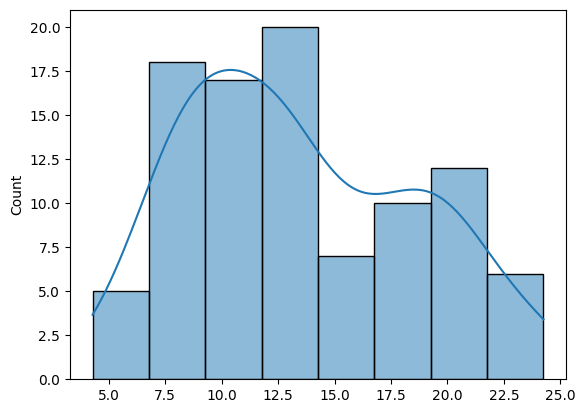

In [143]:
arr = wgp_arr[1,:][np.where(wgp_arr[1,:] > 1)]/10**6
sns.histplot(arr,kde=True)



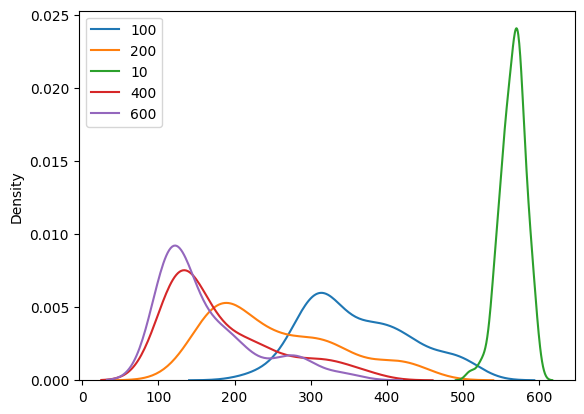

In [206]:
# sns.scatterplot(rpr_arr.std(1))
# (rpr_arr.std(1)[200],
# np.average((np.average(rpr_arr[200]) - rpr_arr[200])**2)**.5)
sns.kdeplot(rpr_arr[100], label=100)
sns.kdeplot(rpr_arr[200], label=200)
sns.kdeplot(rpr_arr[10] , label=10)
sns.kdeplot(rpr_arr[400], label=400)
sns.kdeplot(rpr_arr[600], label=600)
plt.legend()

123

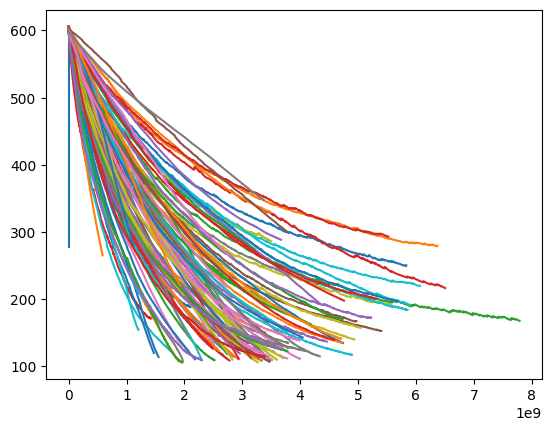

In [261]:
# f_z = np.poly1d([5.64E-06, -0.002039437, 1.0062])
# p_z_arr = rpr_arr / f_z(rpr_arr)
plt.plot(*np.array([wgp_arr.cumsum(0),rpr_arr]).reshape((2,601,108)))
123